# Jan 2023 Cu-F




In [51]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [34]:
# Directory where we keep our analysis code
project_dir = os.path.expanduser('~/git/nh3-analysis/jan2023/')

# Upper-level data directory for the time-resolved data
data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-F-Expt-9'

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-29196/shared/autoreduce/'

# Directory with steady-state fit results
fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting'

# Directory where the dynamic data and fit results are. 
dyn_data_dir = os.path.join(data_dir, '30s')
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024'

dynamic_run = 201348 # Cycle 1


## Summary of 60 Hz data

/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201341/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201349/__model-profile.dat


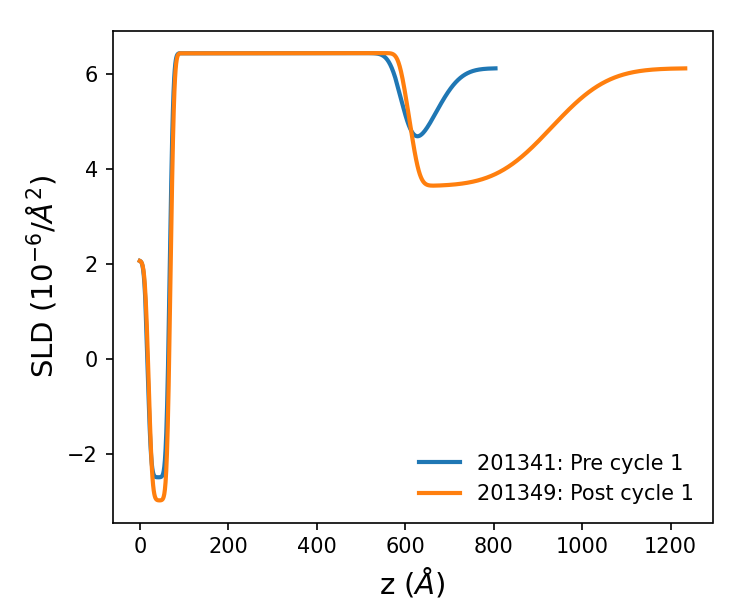

In [35]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(201341, "201341: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(201349, "201349: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


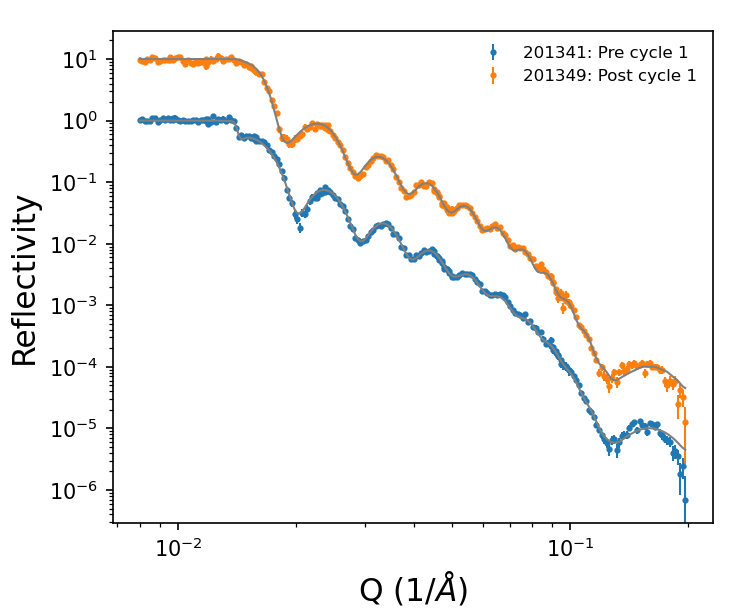

In [36]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(201341, '201341: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(201349, '201349: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


## CP 1: Change as a function of time

/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-F-Expt-9/30s
11
Ref r201348_t000000.txt
Skipped: 0


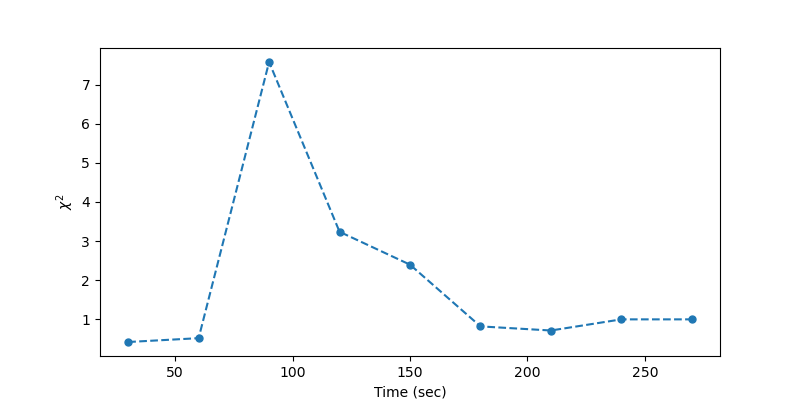

In [5]:
importlib.reload(summary_plots)
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(201348, dyn_data_dir, first=0, last=-1, out_array=None)

11


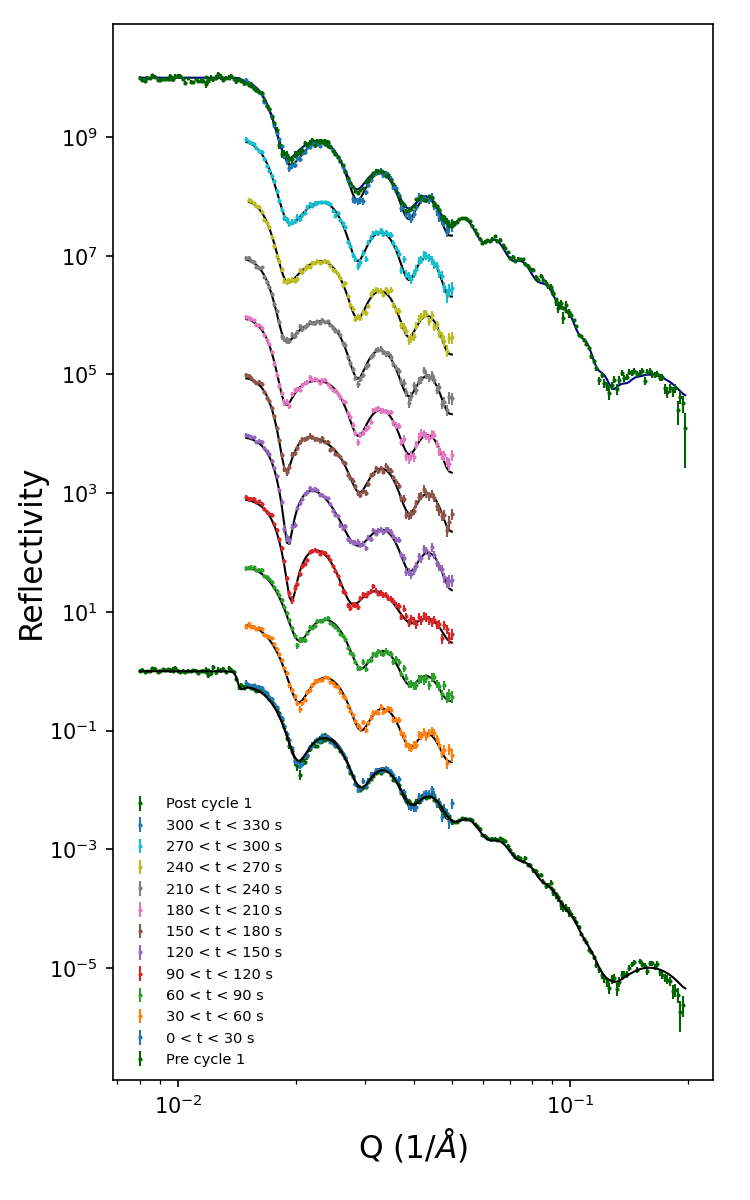

In [56]:
importlib.reload(summary_plots)

last_time = 12

file_list = summary_plots.plot_dyn_data(dynamic_run, 201341, 201349, first_index=0, last_index=last_time, delta_t=30, model_name='model-loop-201348',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201349/__model-profile.dat
Processing: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024/r201348_t000300/model-loop-201348.py
Read in /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024/r201348_t000300/model-loop-201348.py
Model: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024/r201348_t000240/model-loop-201348
Z offset = -262.692;    Z_max = 1186.1
Too many points: pruning down
MC file read: 0.0013058185577392578 sec
Done 6.4692702293396 sec
Processing: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024/r201348_t000300/model-loop-201348.py
Read in /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024/r201348_t000300/model-loop-201348.py
Model: /SNS/users/m2d/git/nh3-analysis/jan2023/dyn-fitting/201348-dyn/results-30s-bck-mar2024/r201348_t000210/model-loop-20

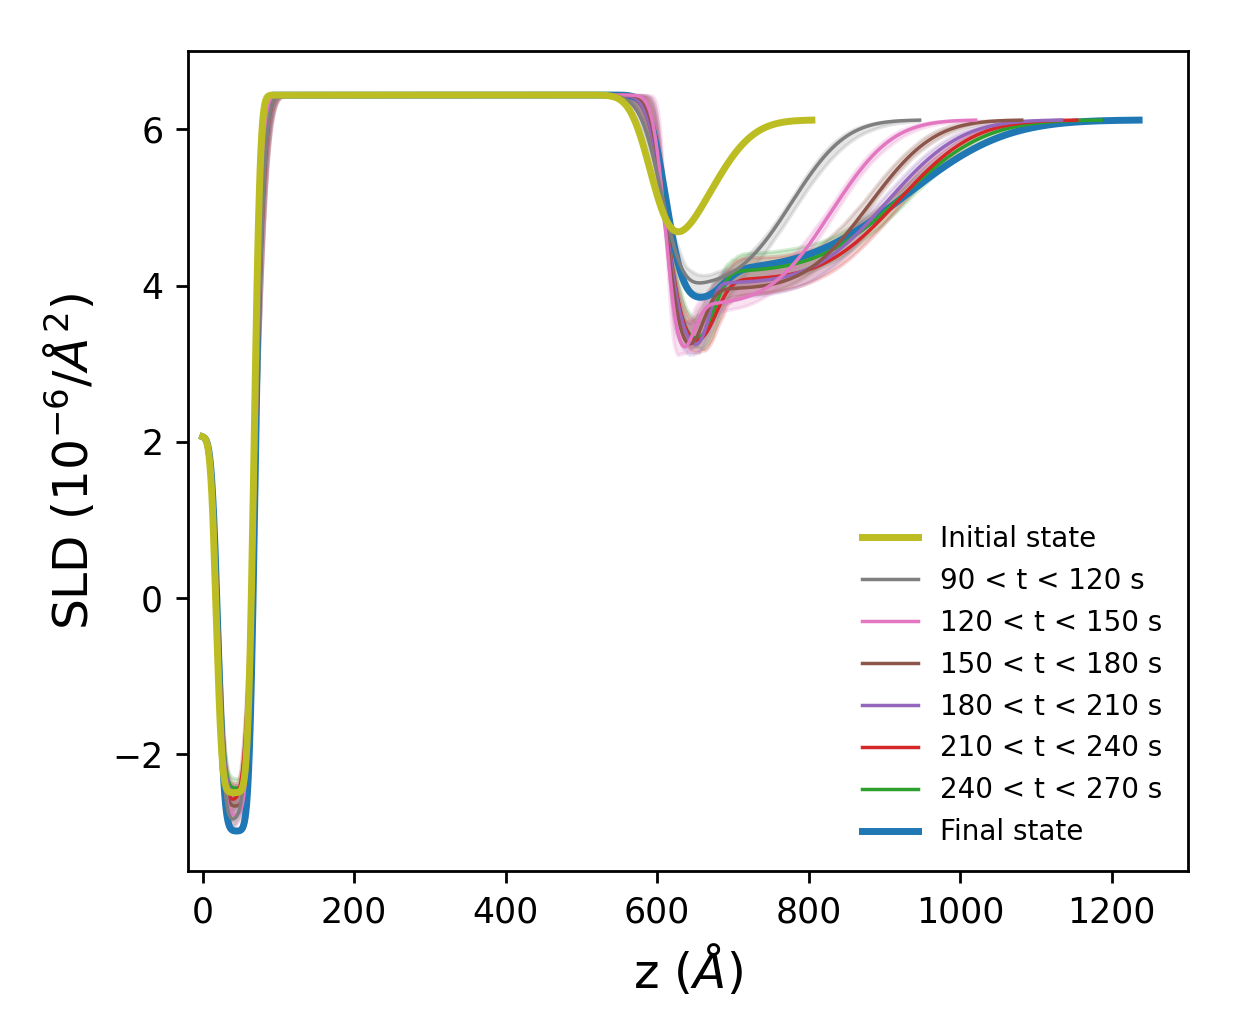

In [52]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-201348.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 201341, 201349, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=True, model_file=model_file, model_name='model-loop-201348', legend_font_size=8, max_z=1300, sld_range=[-3.5, 7])
plt.savefig('jan2023-Cu-F.svg')

In [1]:
importlib.reload(summary_plots)

timestamps, trend_data, trend_err = summary_plots.trend_data(file_list, 201341, 201349, 
                                                   fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-201348', model_file=None, add_plot=0)


NameError: name 'importlib' is not defined

In [54]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-201348.json')
summary_plots.write_md_table(trend_file)

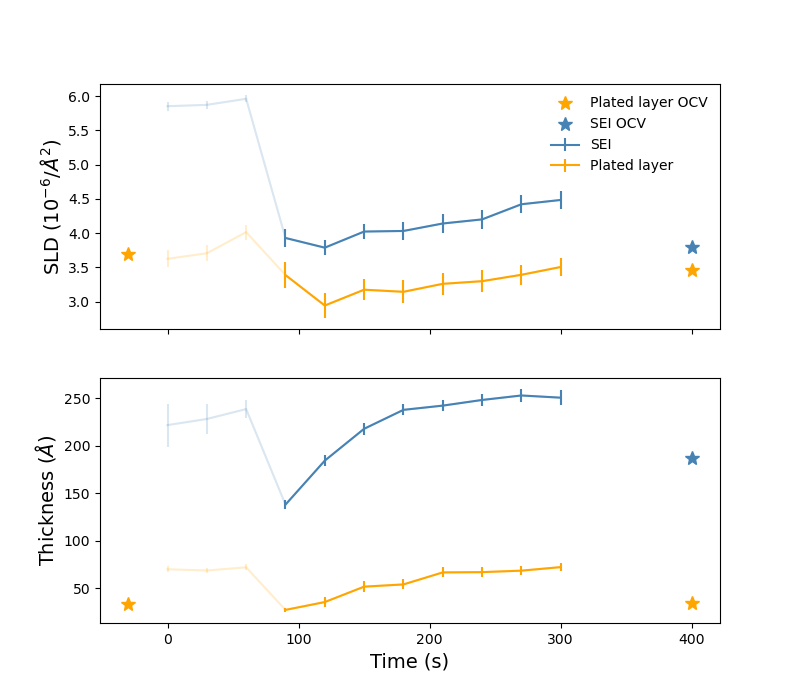

In [55]:

material_rho = [3.690244438447533, 3.460549199161475]
material_thickness = [33.21387416625166, 34.93307729921375]
sei_rho = [3.7980399602179533]
sei_thickness = [187.06369407396915]


i_start = 3

fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8,7), sharex=True)
plt.subplot(2, 1, 1)
plt.errorbar(timestamps, trend_data['SEI rho'], yerr=trend_err['SEI rho'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material rho'], yerr=trend_err['material rho'], alpha=0.2, color='orange')

plt.errorbar(timestamps[i_start:], trend_data['SEI rho'][i_start:], yerr=trend_err['SEI rho'][i_start:], label='SEI', color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material rho'][i_start:], yerr=trend_err['material rho'][i_start:], label='Plated layer', color='orange')

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_rho, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_rho, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

#plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.legend(frameon=False)



plt.subplot(2, 1, 2)
plt.errorbar(timestamps, trend_data['SEI thickness'], yerr=trend_err['SEI thickness'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material thickness'], yerr=trend_err['material thickness'], alpha=0.2, color='orange')
plt.errorbar(timestamps[i_start:], trend_data['SEI thickness'][i_start:], yerr=trend_err['SEI thickness'][i_start:], color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material thickness'][i_start:], yerr=trend_err['material thickness'][i_start:], color='orange')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Thickness ($\AA$)', fontsize=14)

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_thickness, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_thickness, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')
